In [1]:
%matplotlib widget

In [2]:
%load_ext autoreload
%autoreload 2
from sage.all import *
from utility import *

Pi = sage.symbolic.constants.pi

In [3]:
# Define here the equation defining your affine variety.
x,y,z,w = var('x, y, z, w', domain=CC)

a1,a2,a3, a4 = var('a1,a2,a3,a4', domain=CC) # s1,s2 in C, s3 in C^*
s1 = a1*a4+a2*a3
s2 = a2*a4+a3*a1
s3 = a3*a4+a1*a2
s4 = a1*a2*a3*a4 + a1^2 + a2^2 + a3^2 + a4^2 - 4
X = x*y*z + x^2 + y^2 +z^2 -s1*x - s2*y - s3*z + s4 
X = X.subs(a1==1, a2== 0, a3== 0, a4==0)

print(X)

x*y*z + x^2 + y^2 + z^2 - 3


In [4]:
# Check if X is smooth
X_vars = [x,y,z]
constraints = [X.diff(var) == 0 for var in X_vars]
solutions = solve(constraints, X_vars, solution_dict=True)
singularities = [point for point in solutions if X.subs(point).is_zero()]


if singularities:
    print(f"The variety is singular at the following points: {singularities}")
else:
    print("The variety is smooth.")

# Check if is_zero is reliable: Distrust the result if below values are close to 0.
for point in solutions:
    print(X.subs(point))

The variety is smooth.
1
1
1
1
-3


# Defining the Lefschetz Bifibration

## The fibration $\pi$

The fibre over t in C is -1/2*(10*t - x + 5*I*y)*x*y + 1/4*(10*t - x + 5*I*y)^2 + x^2 + y^2 - 3 == 0
The model fibre over 0 is 1/2*(x - 5*I*y)*x*y + 1/4*(x - 5*I*y)^2 + x^2 + y^2 - 3 == 0
Critical values: 9 
Critical points: 9


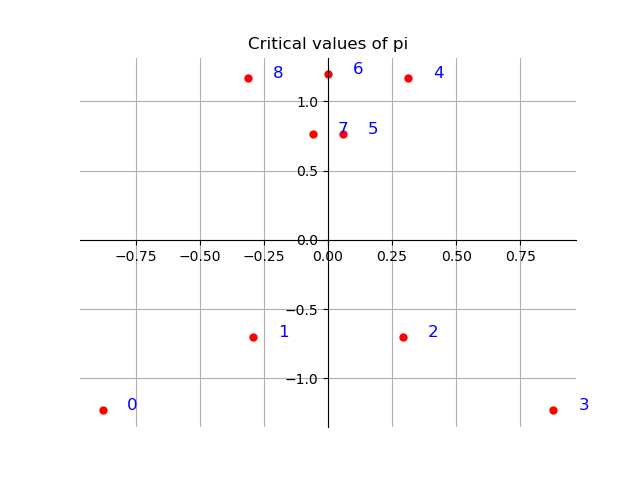

In [16]:
alpha, beta, gamma = var('alpha, beta, gamma', domain=CC)
pi = alpha*x + beta*y + gamma*z


pi = pi.subs({
    alpha: 0.1,
    beta: -0.5*I,
    gamma: -0.2
})

pi = LefschetzFibration([x,y,z], X, pi)
origin_fibre = 0
solvefor=z

t = var('t', domain=CC)

t_fibre = pi.get_fibre(t, solvefor)
print(f'The fibre over t in C is {t_fibre.simplify()==0}')
print(f'The model fibre over {origin_fibre} is {t_fibre.simplify().subs({t:origin_fibre})==0}')

crit_values_pi = sort_by_angle(pi.get_critical_values(), origin_fibre)
crit_points_pi = pi.get_critical_points()

print(f'Critical values: {len(crit_values_pi)} \nCritical points: {len(crit_points_pi)}')

plot_points_ordered(crit_values_pi, 'Critical values of pi', origin_fibre=origin_fibre)

### Criticality at Infinity

In [11]:
print(intersection_summary(pi))
intersection = intersection_at_infinity(pi)

for point in intersection:
    print(kernels(pi, point))
    print(point)

The hyperplane at infinity is given by 1.00000000000000*x*y*z == 0.
The fibration vanishes at [0.100000000000000*x - 0.500000000000000*I*y - 0.200000000000000*z == 0].
Their intersection consists of [{x: 0, y: 1, z: -5/2*I, w: 0}, {x: 1, y: 0, z: 1/2, w: 0}, {x: 1, y: -1/5*I, z: 0, w: 0}].
None
Vector space of degree 4 and dimension 1 over Symbolic Ring
Basis matrix:
[                  0    1.00000000000000 -2.50000000000000*I                   0]
{x: 0, y: 1, z: -5/2*I, w: 0}
Vector space of degree 4 and dimension 1 over Symbolic Ring
Basis matrix:
[ 1.00000000000000                 0 0.500000000000000                 0]
{x: 1, y: 0, z: 1/2, w: 0}
Vector space of degree 4 and dimension 1 over Symbolic Ring
Basis matrix:
[    1.00000000000000 -0.200000000000000*I                    0                    0]
{x: 1, y: -1/5*I, z: 0, w: 0}


## The fibration $\rho$

The expression of rho over t in C is 0.900000000000000*x + 0.500000000000000*y
Critical values: 6
Critical points: 6


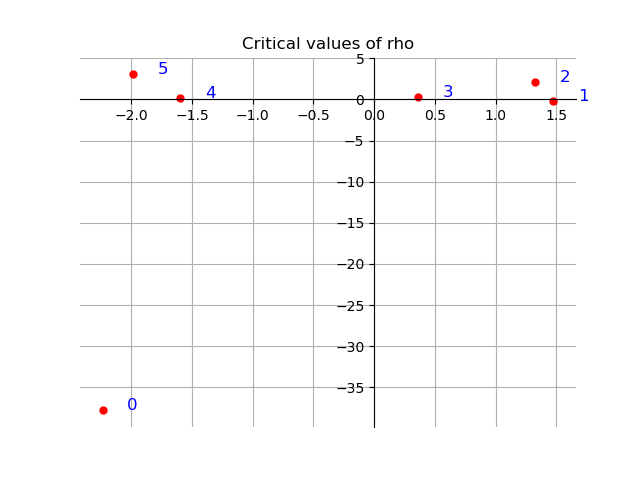

In [20]:
ar = var('ar', domain=CC)
br = var('br', domain=CC)

rho = ar*x + br*y

# rho = rho.subs({ar: 3*e^(2*Pi*I*-0.05).n(), br: 8*e^(2*I*Pi*0.08).n()})

# rho = rho.subs({ar: -2, br: 1})
rho = rho.subs({ar: 0.9, br: 0.5})
origin_fibre_rho = -15*I

rho_t = rho.subs(solvefor == t_fibre)
rho_0 = rho_t.subs(t==origin_fibre)

rho = LefschetzFibration([x,y], t_fibre.subs(t==origin_fibre), rho_0)

crit_points_rho = rho.get_critical_points()
crit_values_rho = sort_by_angle(rho.get_critical_values())

print(f'The expression of rho over t in C is {rho_t}')
print(f'Critical values: {len(crit_values_rho)}')
print(f'Critical points: {len(crit_points_rho)}')
plot_points_ordered(crit_values_rho, origin_fibre=origin_fibre_rho, title="Critical values of rho")


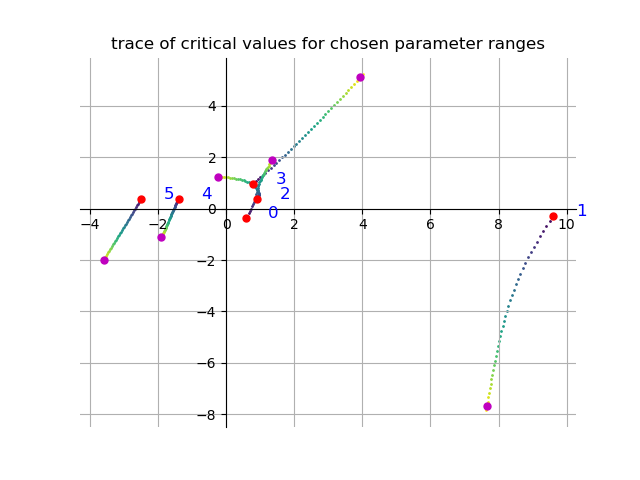

In [15]:
a_path = pl_path([1.5], steps=40)
b_path = pl_path([-0.5, I], steps=40)

rho_params = {'a': a_path, 'b': b_path}

crits = parameterized_rho_crits(rho, rho_params)
plot_paths(crits)

### Vanishing Cycles of Rho

#### Origin Fibre

-25/162*(y + 30*I)*y*(-(9*I + 1)*y - 30*I) + 25/81*(y + 30*I)^2 + y^2 + 25/324*(-(9*I + 1)*y - 30*I)^2 - 3
[-2.05179729 +1.85063272j -1.77949806 -2.01130163j
 -0.06480221-33.77445305j]


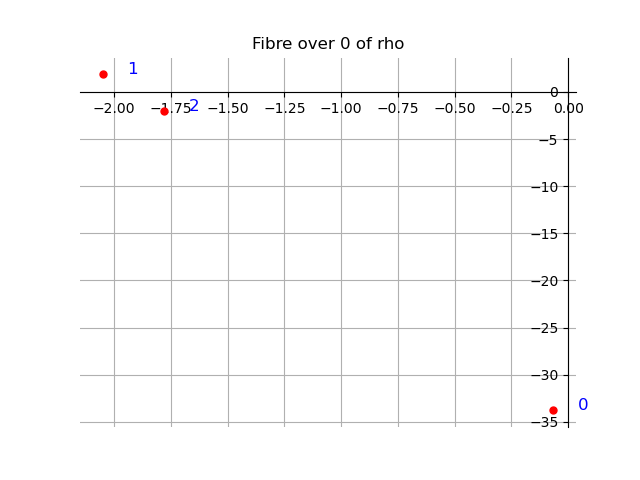

In [21]:
solvefor_rho = x

t_fibre_rho = rho.get_fibre(t,solvefor_rho)
fibre_rho_0 = t_fibre_rho.subs(t==origin_fibre_rho)
print(fibre_rho_0)

sols = NumericalRoots(fibre_rho_0)
print(sols)

plot_points_ordered(sols, origin_fibre=origin_fibre_rho, title="Fibre over 0 of rho")


/mnt/c/Users/joels/Documents/Research/Math/Code/AffineHandlebodies/utility.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


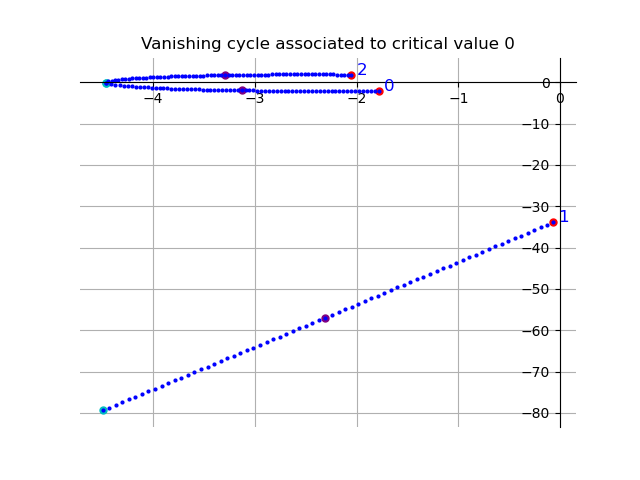

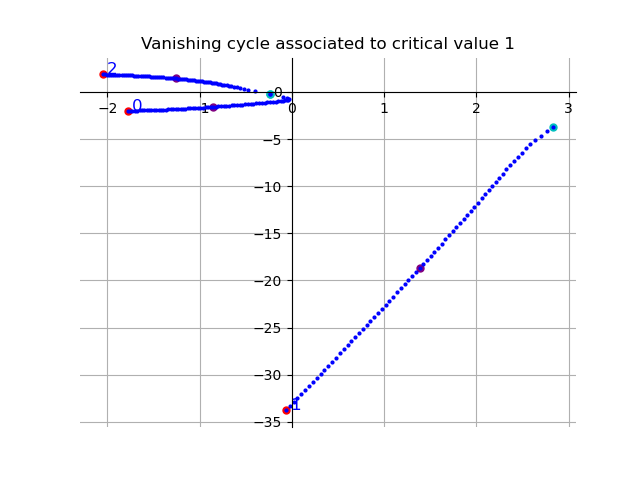

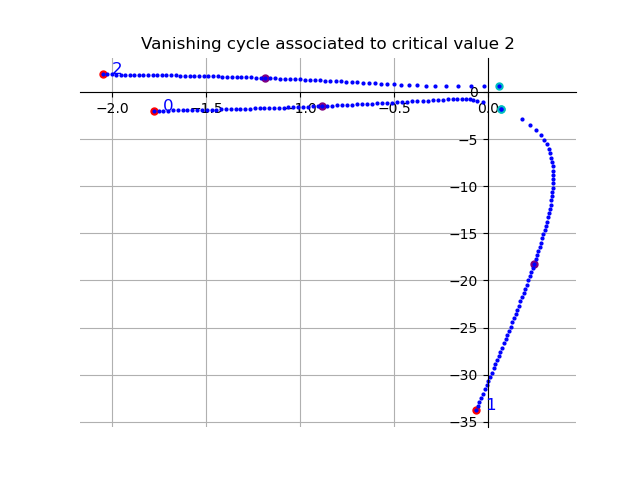

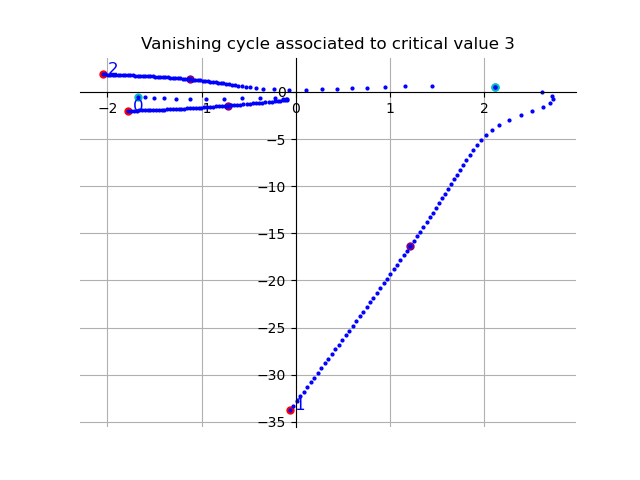

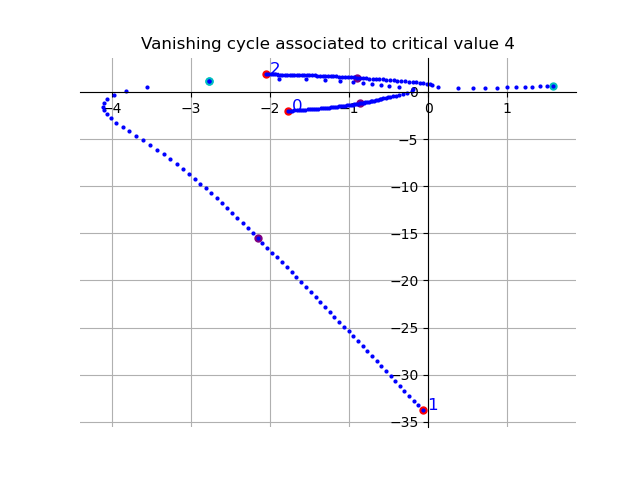

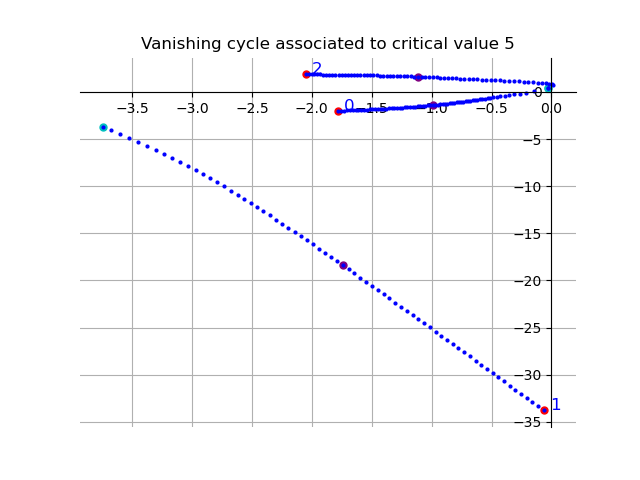

In [22]:
for (index, point) in enumerate(crit_values_rho):
    path = pl_path([origin_fibre_rho, point])
    trace_preimage(rho, t, path, solvefor=solvefor_rho, title=f'Vanishing cycle associated to critical value {index}')    

## Matching Paths - Images of Vanishing Cycles

In [23]:
for index, crit in enumerate(crit_values_pi):
    matching = pi.get_matching_path(rho_0, origin_fibre, crit, solvefor=solvefor)
    plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre_rho)

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object